## 머신 러닝 개념

###  인공지능(AI) 분류
#### [1] 규칙기반 AI : rule-based system , 수동으로 규칙(특징)을 입력하면 기계가 추론, Prolog, LISP
#### [2] 학습기반 AI : 머신 러닝(Machine Learning), 데이터를 입력하면 기계가 스스로 새로운 특징을 학습하고 예측

### 머신러닝 분류
#### [1] 지도학습(Supervised Learning) : 답이 주어진 상태에서 학습
#### - 회귀(Regression)
#### - 분류(Classification)
#### [2] 비지도학습(Unsupervised Learning) : 답을 모르고 학습
#### - 군집화(Clustering)
#### - 차원 축소(Dimension Reduction) : PCA(주성분 분석, Pricipal Component Analysis)
#### [3] 강화 학습(Reinforcement Learning) : 답을 모르고 있는 상태에서 답을 알아가는 강한 인공지능(자아를 갖음, 인간수준)
#### : 게임, 알파고(DQN)

##    회귀(Reression) 모델

#### [1] 선형회귀(Linear Regression) : 1차 함수, 직선의 방정식
#### [2] 가중치(Weight) : 입력변수가 출력에 영향을 미치는 정도를 설정, 기울기 값
#### [3] 편향(Bias) : 기본 출력 값이 활성화되는 정도를 설정, y 절편
#### [4] 비용함수(Cost function) : 2차 함수, 포물선의 방정식
### - cost(비용) = 오차 = 에러 = 손실(loss)
#### - cost(W,b) = (H(x) - y)^2
#### [5] 예측(가설,Hypothesis) 함수: predict  ,  H(X) :예측 값, y:답, label, target, x : 입력,피쳐
#### - H(x) = WX + b
#### [6] 경사하강법(Gradient Descent algorithm)
#### : 비용이 가장 작은 기울기 값을 구하는 알고리즘

w :-1 , cost: 18.666666666666668
w :0 , cost: 4.666666666666667
w :1 , cost: 0.0
w :2 , cost: 4.666666666666667
w :3 , cost: 18.666666666666668


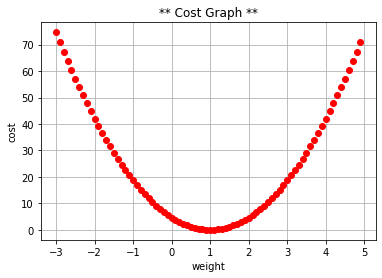

In [115]:
# 비용함수의 구현
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def cost(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w * x[i]      # 예측 방정식
        loss = (hx - y[i])**2
        c += loss
    return c/len(x)    # 평균 제곱 오차

x = [1,2,3]      #  입력 값
y = [1,2,3]      # 답
print('w :-1 , cost:',cost(x,y,-1))
print('w :0 , cost:',cost(x,y,0))
print('w :1 , cost:',cost(x,y,1))
print('w :2 , cost:',cost(x,y,2))
print('w :3 , cost:',cost(x,y,3))

# 비용함수 : x축은 weight, y축은 cost로 하는 2차 함수, 포물선의 방정식
for i in range(-30,50):
    w = i/10
    c = cost(x,y,w)
    plt.plot(w,c,'ro')

plt.title('** Cost Graph **')    
plt.xlabel('weight')
plt.ylabel('cost')  
plt.grid(True)
plt.show()    

### 미분 : 순간 변화량, 기울기, x 축으로 1 만큼 움직였을 때 y 축으로 움직인 거리
#### 함수 미분 공식 정리  :     f(x) = x^n   ===>  f'(x) = n*x^(n-1)
* y = 3           ===>  y' = 0
* y = 2x          ===>  y' = 2
* y = x^2         ===>  y' = 2x
* y = (x + 1)^2   ===>  y' = 2(x+1) 
###### (y = x^2 + 2x + 1 ==> y' = 2x + 2 =2(x + 1))



In [116]:
# 경사 하강법 알고리즘 함수 구현, 미분 적용
def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx  - y[i])*x[i]  # 곱하기 2를 생략   
        # 비용함수의 미분 :  cost(w) = (w*x[i] - y[i])**2 의 미분
        # cost(w) = w^2 * x[i]^2  - 2 * w*x[i]*y[i] + y[i]^2
        # cost'(w) = 2*w*x[i]^2 - 2*x[i]*y[i]= 2*x[i](w*x[i] - y[i]) 
        c += loss
    return c/len(x)

# 학습(train,fit) 시작    
print('---------start training!!')    
w,old =10,100
for i in range(1000):
    c = cost(x,y,w)
    grad = gradient_descent(x,y,w)
    w -= 0.1*grad    # 0.1 학습률(learning rate), 하이퍼 파라메타
#     print('[%03d]'%i,'cost:',c,'old:',old,'weight:',w)
    if c >= old and abs(c - old) < 1.0e-15: # cost 가 1.0e-15 값 보다도 더 줄지 않을 때
#     if c == old:  # cost가 더이상 줄지 않을 때        
        break
    old = c    
print('---------end training')        
print('weight:',w,'train:',i,'회')   

---------start training!!
---------end training
weight: 1.0 train: 63 회


In [117]:
# Linear Regression 모델 구현

# 알고리즘 구현 : 비용함수와 경사 하강법 알고리즘 함수 구현
# (1) 비용 함수 구현
def cost(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w * x[i]      # 예측 방정식
        loss = (hx - y[i])**2
        c += loss
    return c/len(x)    # 평균 제곱 오차

# (2) 경사 하강법 알고리즘 함수 구현
def gradient_descent(x,y,w):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        loss = (hx  - y[i])*x[i]  # 곱하기 2를 생략   
        # 비용함수의 미분 :  cost(w) = (w*x[i] - y[i])**2 의 미분
        # cost(w) = w^2 * x[i]^2  - 2 * w*x[i]*y[i] + y[i]^2
        # cost'(w) = 2*w*x[i]^2 - 2*x[i]*y[i]= 2*x[i](w*x[i] - y[i]) 
        c += loss
    return c/len(x)


# (3) 학습(fit) 함수 구현
def fit(x,y):  # x,y값으로 기울기를 구해낸다
    print('---------start training!!')    
    w, old = 10, 100 
    for i in range(1000):
        c = cost(x,y,w)
        grad = gradient_descent(x,y,w)
        w -= 0.1*grad    # 0.1 학습률(learning rate), 하이퍼 파라메타
        print('[%03d]'%i,'cost:',c,'old:',old,'weight:',w)
        if c >= old and abs(c - old) < 1.0e-15: # cost 가 1.0e-15 값 보다도 더 줄지 않을 때
            break
        old = c    
    print('---------end training')        
    return w

# (4) 예측(predict) 함수 구현
def predict(w,x):
    hx = w*np.array(x)
    return list(hx)



In [124]:
# 머신 러닝 사용자가 구현 할 부분

# (1) fit() 함수를 호출하여 학습 

# train 데이터 셋  : x,y 모두 사용
x_train = [1,2,3]
y_train = [1,2,3]
# y_train = [2,4,6]
# y_train = [2,4,5]

w = fit(x_train,y_train)
print('weight:',w)

# (2) predcit() 함수를 호출하여 학습
x_predict = [4,5,6]   # x 값 만 사용
y_predict = predict(w,x_predict)
print('x:',x_predict,'H(x):',y_predict)

In [136]:
# (3) 정확도 검증(validation)

# 정확도 측정 함수 구현 
# 분류(classification) 일때
def get_accuracy(w,x_test,y_test):
    y_predict = predict(w,x_test)
    print(y_predict)
    correct = 0
    for k,_ in enumerate(y_test):
        if y_test[k] == y_predict[k]:
            correct += 1
    accuracy = round(correct/len(y_test),2)
    return accuracy


# Linear Regression의 정확도는 RMSE 로 평가
# RMSE(Root Mean Squared Error) : 평균 제곱근 오차
def get_rmse(w,x_test,y_test):
    y_predict = predict(w,x_test) 
    print(y_predict)
    squred_error = 0
    for k,_ in enumerate(y_test):
        squred_error += (y_predict[k] - y_test[k])**2
    mse = squred_error/len(y_test)
    rmse = np.sqrt(mse)
    return rmse

# 머신 러닝 사용자가 구현 할 부분

# classification 의 정확도(Accuracy)
x_test = [1,2,3]
y_test = [1,2,4]
accuracy = get_accuracy(w,x_test,y_test)        
print('Accuracy:',accuracy)

# Linear Regression 의 RMSE
x_test = [1,2,3]
# y_test = [1,2,3]    # RMSE: 0.0
y_test = [1,2,10]   # RMSE: 0.0

rmse = get_rmse(w,x_test,y_test)        
print('RMSE:',rmse)    

[1.0, 2.0, 3.0]
Accuracy: 0.67
[1.0, 2.0, 3.0]
RMSE: 4.041451884327381


### Boston 주택 가격 예측(Linear Regression, scikit-learn 사용)

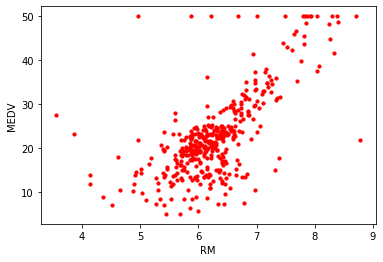

In [139]:
df = pd.read_csv('boston_train.csv')
plt.scatter(df['RM'],df['MEDV'], color = 'r', s=10)
plt.xlabel('RM')
plt.ylabel('MEDV')  
plt.show()
# df

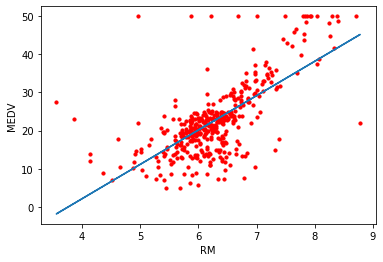

In [153]:
# 1차원( 단항, 피쳐 1개) 회귀 모형의 예측
from sklearn.linear_model import LinearRegression

# 인스턴스 생성
lr = LinearRegression()

# 입출력 데이터를 설정
x = df['RM'].values.reshape(-1,1)    # (400,1)
y = df['MEDV'].values.reshape(-1,1)  # (400,1)

# 회귀모형의 학습 , x,y를 입력
lr.fit(x,y)

# 예측 : x 만 입력
y_predict = lr.predict(x)

# 시각화
plt.scatter(x,y, color = 'r', s=10)
plt.xlabel('RM')
plt.ylabel('MEDV') 

plt.plot(x,y_predict)
plt.show()
# list(zip(y,y_predict))

In [161]:
# 정확도 측정, RMSE

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y,y_predict)
rmse = np.sqrt(mse)  # root(제곱근)
print('RMSE:',rmse)  # 

from sklearn.metrics import r2_score

r2 = r2_score(y,y_predict) # R-squred(결정계수), 예측 값의 분산/실제값의 분산
print('r2_score:',r2)


RMSE: 6.964958263761021
r2_score: 0.46928062004385107


In [158]:
df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,MEDV
0,2.30040,0.0,19.58,0.605,6.319,96.1,2.1000,403,14.7,23.8
1,13.35980,0.0,18.10,0.693,5.887,94.7,1.7821,666,20.2,12.7
2,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,233,17.9,26.6
3,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,305,19.2,21.7
4,0.03768,80.0,1.52,0.404,7.274,38.3,7.3090,329,12.6,34.6
...,...,...,...,...,...,...,...,...,...,...
395,0.23912,0.0,9.69,0.585,6.019,65.3,2.4091,391,19.2,21.2
396,0.04560,0.0,13.89,0.550,5.888,56.0,3.1121,276,16.4,23.3
397,1.38799,0.0,8.14,0.538,5.950,82.0,3.9900,307,21.0,13.2
398,7.36711,0.0,18.10,0.679,6.193,78.1,1.9356,666,20.2,11.0
